In [1]:
import tensorflow as tf

# Load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize the pixel value
training_images = training_images / 255.0
test_images = test_images / 255.0

# Standard Model

In [2]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# setup training parameters
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# training the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVELUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5005 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3768 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3378 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3126 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2960 - accuracy: 0.8910

MODEL EVELUATION:
313/313 [==============================] - 1s 4ms/step - loss: 0.3803 - accuracy: 0.8652


# Convolutional Neural Network

In [3]:
# define the model
model = tf.keras.models.Sequential([
    
    # add convolutaions and max pooling
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    
])

# print the model summary
model.summary()

# use same settings
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# training the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVELUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Visualizing the Convolutions and Pooling

In [5]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


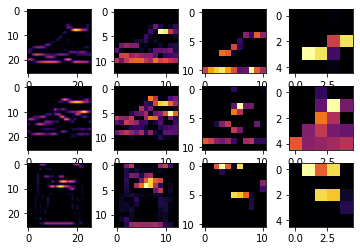

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f,axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=1
CONVOLUTION_NUMBER=5

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap="inferno")
    axarr[0,x].grid(False)
    
    f1 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap="inferno")
    axarr[1,x].grid(False)
    
    f1 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap="inferno")
    axarr[2,x].grid(False)

    